In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from gensim.models import FastText
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier


# Gerekli nltk kaynaklarını indirme
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri dengesi sağlama
min_class_size = min(data['Sentiment'].value_counts())
balanced_data = data.groupby('Sentiment').sample(n=min_class_size, random_state=42)

# Veri setini eğitim ve test kümelerine ayırma
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42)

# FastText modelini eğitme
tokenized_tweets = [preprocess_text(tweet) for tweet in train_data['text']]
model = FastText(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4, epochs=10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# TF-IDF vektörlerini oluşturma
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['text']).toarray()

# FastText vektörlerini oluşturma
X_train_fasttext = np.array([np.mean([model.wv[word] for word in tweet if word in model.wv] or [np.zeros(100)], axis=0) for tweet in train_data['text']])
X_test_fasttext = np.array([np.mean([model.wv[word] for word in tweet if word in model.wv] or [np.zeros(100)], axis=0) for tweet in test_data['text']])

# TF-IDF ve FastText vektörlerini birleştirme
X_train = np.hstack((X_train_tfidf, X_train_fasttext))
X_test = np.hstack((X_test_tfidf, X_test_fasttext))

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])
y_test = label_encoder.transform(test_data['Sentiment'])

# XGBoost modelini eğitme
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Test verilerinde tahmin yapma
y_pred = xgb_model.predict(X_test)

# Performansı değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8371988290925467
              precision    recall  f1-score   support

    negative       0.92      0.75      0.83      5866
     neutral       0.75      0.96      0.84      6029
    positive       0.89      0.79      0.84      5869

    accuracy                           0.84     17764
   macro avg       0.85      0.84      0.84     17764
weighted avg       0.85      0.84      0.84     17764



Polarity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from gensim.models import FastText
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier


# Gerekli nltk kaynaklarını indir
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri dengesi sağlama
min_class_size = min(data['Sentiment'].value_counts())
balanced_data = data.groupby('Sentiment').sample(n=min_class_size, random_state=42)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,neutral


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Duygu analizi örneği için veri setinden rastgele bir örnek al
sample_tweet_index = np.random.randint(0, len(train_data))  # Rastgele bir tweet indexi seç
sample_tweet_text = train_data['text'].iloc[sample_tweet_index]  # Rastgele seçilen tweetin metnini al

# Duygu tahmini yapma
predicted_sentiment = analyze_sentiment(sample_tweet_text)

# Sonucu yazdırma
print("Sample Tweet:", sample_tweet_text)
print("Predicted sentiment for the sample tweet:", predicted_sentiment)


Sample Tweet: Here’s a look at the spread of active #Covid19 cases, a disease which has killed over 769,000 people worldwide: https://t.co/DnRkNtotWi
Predicted sentiment for the sample tweet: negative


**veri önişlemesiz wordcloud kullanarak pozitif negatif nötr kelime bulutlarını çıkar**

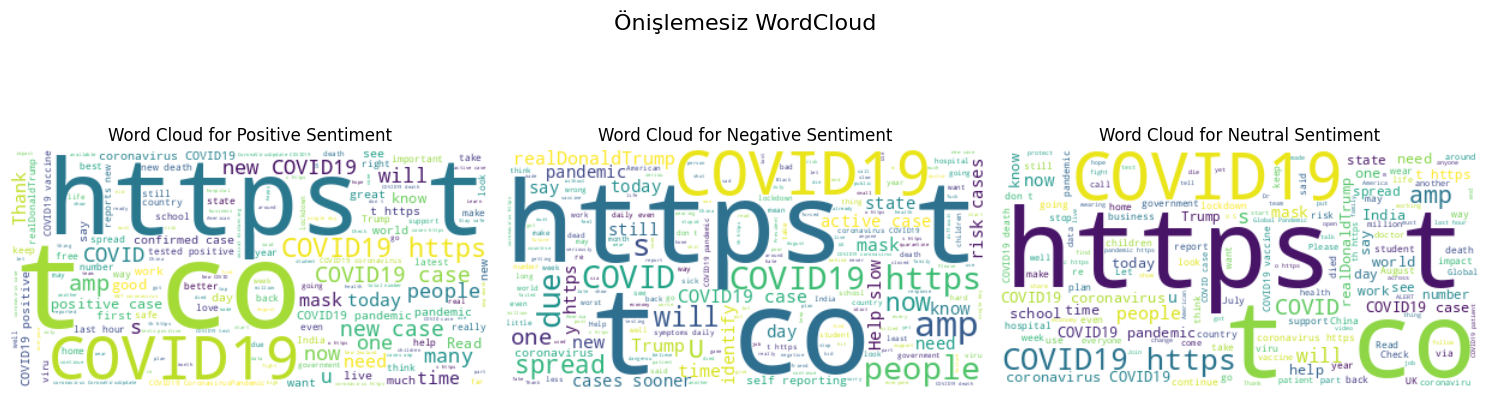

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from gensim.models import FastText
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri dengesi sağlama
min_class_size = min(data['Sentiment'].value_counts())
balanced_data = data.groupby('Sentiment').sample(n=min_class_size, random_state=42)


# Kelime bulutu oluşturma fonksiyonu
def generate_wordcloud(sentiment, ax):
    # Belirli duygu etiketi için metinleri birleştirme
    text = ' '.join(data[data['Sentiment'] == sentiment]['text'])

    # WordCloud nesnesini oluşturma
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(text)

    # WordCloud'u görselleştirme
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    ax.axis('off')

# Subplot oluşturma
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pozitif duygu için kelime bulutu oluşturma
generate_wordcloud('positive', axs[0])

# Negatif duygu için kelime bulutu oluşturma
generate_wordcloud('negative', axs[1])

# Nötr duygu için kelime bulutu oluşturma
generate_wordcloud('neutral', axs[2])

plt.suptitle('Önişlemesiz WordCloud', fontsize=16)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


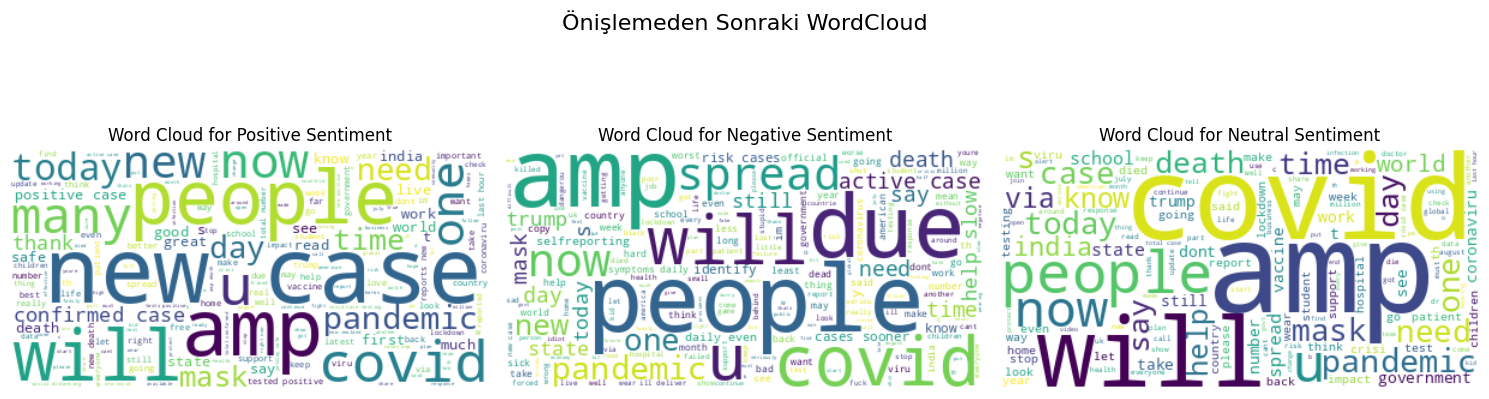

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from gensim.models import FastText
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerekli nltk kaynaklarını indir
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")
# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Metin temizleme fonksiyonu
def clean_text(text):
    # URL'leri kaldırma
    text = re.sub(r'http\S+', '', text)
    # Mentions (@) kaldırma
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldırma
    text = re.sub(r'#\w+', '', text)
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    # Sadece harfleri ve boşlukları bırakma
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Küçük harfe çevirme
    text = text.lower().strip()
    return text

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)
data['text'] = data['text'].apply(clean_text)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
additional_stopwords = {
    'covid', 'coronavirus','daily','india','update','need', 'pandemic', 'virus', 'rt', 'today', 'people', 'amp', 'test', 'even', 'dont', 'report', 'like',
    'number', 'latest', 'case', 'death', 'mask', 'today', 'time', 'many', 'little', 'first', 'total', 'now', 'day',
    'week', 'month', 'year', 'ago', 'next', 'back', 'then', 'when', 'where', 'here', 'there', 'every', 'all', 'some',
    'any', 'can', 'will', 'just', 'about', 'how', 'why', 'very', 'much', 'more', 'most', 'no', 'nor', 'not', 'off',
    'out', 'up', 'down', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'in', 'out', 'over', 'under', 'again', 'further', 'once'
}

expanded_stopwords = set()
for word in additional_stopwords:
    expanded_stopwords.add(word)
    expanded_stopwords.add(word + 's')  # Çoğul hal ekleniyor
    if word.endswith('e'):
        expanded_stopwords.add(word[:-1])  # Çoğul halden tekil hale geçiş ekleniyor
        expanded_stopwords.add(word[:-1] + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word[:-1] + 'ing')  # Şimdiki zaman ekleniyor
    elif word.endswith('y'):
        expanded_stopwords.add(word[:-1] + 'ies')  # İyelik eki ekleniyor
        expanded_stopwords.add(word[:-1] + 'ied')  # Geçmiş zaman ekleniyor
    else:
        expanded_stopwords.add(word + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word + 'ing')  # Şimdiki zaman ekleniyor

stop_words = stop_words.union(expanded_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri dengesi sağlama
min_class_size = min(data['Sentiment'].value_counts())
balanced_data = data.groupby('Sentiment').sample(n=min_class_size, random_state=42)

# Kelime bulutu oluşturma fonksiyonu
def generate_wordcloud(sentiment, ax):
    # Belirli duygu etiketi için metinleri birleştirme
    text = ' '.join(data[data['Sentiment'] == sentiment]['text'])

    # WordCloud nesnesini oluşturma
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(text)

    # WordCloud'u görselleştirme
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    ax.axis('off')

# Subplot oluşturma
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pozitif duygu için kelime bulutu oluşturma
generate_wordcloud('positive', axs[0])

# Negatif duygu için kelime bulutu oluşturma
generate_wordcloud('negative', axs[1])

# Nötr duygu için kelime bulutu oluşturma
generate_wordcloud('neutral', axs[2])

plt.suptitle('Önişlemeden Sonraki WordCloud', fontsize=16)

plt.tight_layout()
plt.show()

**Makine Öğrenme Videolarını Kullanarak Eğit **

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


# Gerekli nltk kaynaklarını indir
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Metin temizleme fonksiyonu
def clean_text(text):
    # URL'leri kaldırma
    text = re.sub(r'http\S+', '', text)
    # Mentions (@) kaldırma
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldırma
    text = re.sub(r'#\w+', '', text)
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    # Sadece harfleri ve boşlukları bırakma
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Küçük harfe çevirme
    text = text.lower().strip()
    return text

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)
data['text'] = data['text'].apply(clean_text)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
additional_stopwords = {
    'covid', 'coronavirus','daily','india','update','need', 'pandemic', 'virus', 'rt', 'today', 'people', 'amp', 'test', 'even', 'dont', 'report', 'like',
    'number', 'latest', 'case', 'death', 'mask', 'today', 'time', 'many', 'little', 'first', 'total', 'now', 'day',
    'week', 'month', 'year', 'ago', 'next', 'back', 'then', 'when', 'where', 'here', 'there', 'every', 'all', 'some',
    'any', 'can', 'will', 'just', 'about', 'how', 'why', 'very', 'much', 'more', 'most', 'no', 'nor', 'not', 'off',
    'out', 'up', 'down', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'in', 'out', 'over', 'under', 'again', 'further', 'once'
}

expanded_stopwords = set()
for word in additional_stopwords:
    expanded_stopwords.add(word)
    expanded_stopwords.add(word + 's')  # Çoğul hal ekleniyor
    if word.endswith('e'):
        expanded_stopwords.add(word[:-1])  # Çoğul halden tekil hale geçiş ekleniyor
        expanded_stopwords.add(word[:-1] + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word[:-1] + 'ing')  # Şimdiki zaman ekleniyor
    elif word.endswith('y'):
        expanded_stopwords.add(word[:-1] + 'ies')  # İyelik eki ekleniyor
        expanded_stopwords.add(word[:-1] + 'ied')  # Geçmiş zaman ekleniyor
    else:
        expanded_stopwords.add(word + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word + 'ing')  # Şimdiki zaman ekleniyor

stop_words = stop_words.union(expanded_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri setini eğitim ve test kümelerine ayırma
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Metin verilerini önişleme
train_data['processed_text'] = train_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))
test_data['processed_text'] = test_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Metin verilerini önişleme
train_data['processed_text'] = train_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))
test_data['processed_text'] = test_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))

# Özellikleri ve etiketleri belirleme
X_train = train_data['processed_text']
X_test = test_data['processed_text']
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']

# Metin verilerini TF-IDF vektörlerine dönüştürme
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Etiketleri encode etme
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# SVM modelini LinearSVC ile değiştirme ve eğitme
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train_enc)

# Test veri kümesinde tahmin yapma
y_pred = svm_model.predict(X_test_tfidf)

# Model performansını değerlendirme
svm_accuracy = accuracy_score(y_test_enc, y_pred)
print("SVM Modelinin Doğruluğu:", svm_accuracy)

# Diğer makine öğrenmesi modellerini oluşturma
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(random_state=42)
}

results = {}

# Modelleri eğitme ve doğrulukları hesaplama
for name, model in models.items():
    model.fit(X_train_tfidf, y_train_enc)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_enc, y_pred)
    results[name] = accuracy

# Sonuçları tablo olarak gösterme
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Doğruluk'])
print(results_df)

SVM Modelinin Doğruluğu: 0.7691642007704762
                     Doğruluk
Random Forest        0.782145
XGBoost              0.769555
Logistic Regression  0.767154


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


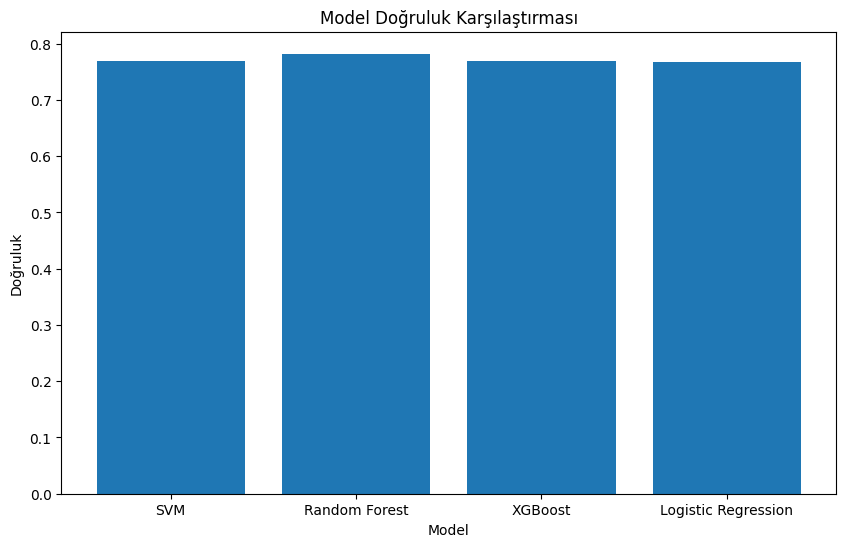

In [ ]:
import matplotlib.pyplot as plt

# Modellerin isimleri ve doğruluk değerlerini listelerde saklayın
model_names = ["SVM", "Random Forest", "XGBoost", "Logistic Regression"]
accuracy_scores = [svm_accuracy, results["Random Forest"], results["XGBoost"], results["Logistic Regression"]]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel("Model")
plt.ylabel("Doğruluk")
plt.title("Model Doğruluk Karşılaştırması")
plt.show()


In [ ]:
import pandas as pd

# Sonuçları tablo olarak gösterme
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.loc['SVM'] = svm_accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)


                     Accuracy
Random Forest        0.782145
XGBoost              0.769555
SVM                  0.769164
Logistic Regression  0.767154


**Derin Öğrenme Modeliyle Analiz**

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


# Gerekli nltk kaynaklarını indir
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Metin temizleme fonksiyonu
def clean_text(text):
    # URL'leri kaldırma
    text = re.sub(r'http\S+', '', text)
    # Mentions (@) kaldırma
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldırma
    text = re.sub(r'#\w+', '', text)
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    # Sadece harfleri ve boşlukları bırakma
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Küçük harfe çevirme
    text = text.lower().strip()
    return text

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)
data['text'] = data['text'].apply(clean_text)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
additional_stopwords = {
    'covid', 'coronavirus','daily','india','update','need', 'pandemic', 'virus', 'rt', 'today', 'people', 'amp', 'test', 'even', 'dont', 'report', 'like',
    'number', 'latest', 'case', 'death', 'mask', 'today', 'time', 'many', 'little', 'first', 'total', 'now', 'day',
    'week', 'month', 'year', 'ago', 'next', 'back', 'then', 'when', 'where', 'here', 'there', 'every', 'all', 'some',
    'any', 'can', 'will', 'just', 'about', 'how', 'why', 'very', 'much', 'more', 'most', 'no', 'nor', 'not', 'off',
    'out', 'up', 'down', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'in', 'out', 'over', 'under', 'again', 'further', 'once'
}

expanded_stopwords = set()
for word in additional_stopwords:
    expanded_stopwords.add(word)
    expanded_stopwords.add(word + 's')  # Çoğul hal ekleniyor
    if word.endswith('e'):
        expanded_stopwords.add(word[:-1])  # Çoğul halden tekil hale geçiş ekleniyor
        expanded_stopwords.add(word[:-1] + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word[:-1] + 'ing')  # Şimdiki zaman ekleniyor
    elif word.endswith('y'):
        expanded_stopwords.add(word[:-1] + 'ies')  # İyelik eki ekleniyor
        expanded_stopwords.add(word[:-1] + 'ied')  # Geçmiş zaman ekleniyor
    else:
        expanded_stopwords.add(word + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word + 'ing')  # Şimdiki zaman ekleniyor

stop_words = stop_words.union(expanded_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri setini eğitim ve test kümelerine ayırma
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Metin verilerini önişleme
train_data['processed_text'] = train_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))
test_data['processed_text'] = test_data['text'].apply(lambda x: ' '.join(preprocess_text(x)))

# Padding yapma
max_len = 50  # Max kelime sayısı
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['processed_text'])
X_train = tokenizer.texts_to_sequences(train_data['processed_text'])
X_test = tokenizer.texts_to_sequences(test_data['processed_text'])
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])
y_test = label_encoder.transform(test_data['Sentiment'])

# CNN modelini oluşturma
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 sınıf (negative, neutral, positive)

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Test verilerinde tahmin yapma
y_pred = np.argmax(model.predict(X_test), axis=1)

# Performansı değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/5
4478/4478 [==============================] - 196s 44ms/step - loss: 0.4737 - accuracy: 0.8315 - val_loss: 0.3646 - val_accuracy: 0.8856
Epoch 2/5
4478/4478 [==============================] - 206s 46ms/step - loss: 0.3015 - accuracy: 0.9033 - val_loss: 0.3531 - val_accuracy: 0.8879
Epoch 3/5
4478/4478 [==============================] - 193s 43ms/step - loss: 0.2056 - accuracy: 0.9325 - val_loss: 0.4016 - val_accuracy: 0.8751
Epoch 4/5
4478/4478 [==============================] - 192s 43ms/step - loss: 0.1314 - accuracy: 0.9581 - val_loss: 0.4841 - val_accuracy: 0.8533
Epoch 5/5
1120/1120 [==============================] - 3s 3ms/step
Accuracy: 0.8367483669253531
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79      6060
     neutral       0.88      0.83      0.85     14822
    positive       0.81      0.88      0.84     14940

    accuracy                           0.84     35822
   macro avg       0.83      0.82      0.83     

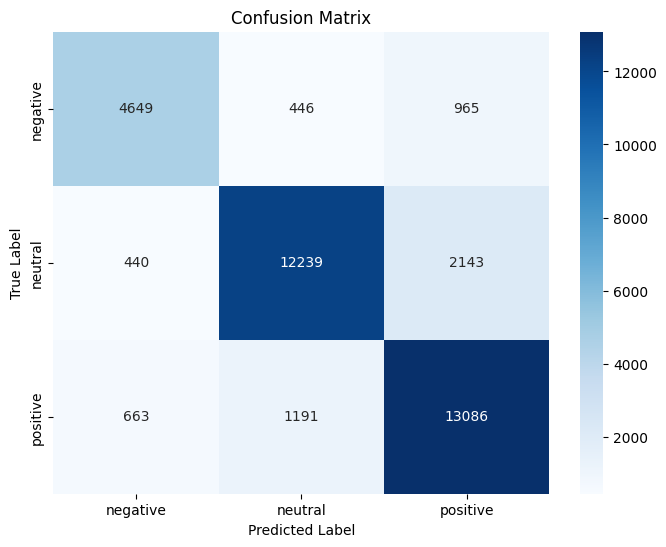

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


LSTM

In [ ]:
import tensorflow as tf
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


# Gerekli nltk kaynaklarını indir
nltk.download('stopwords')
nltk.download('wordnet')

# Veri setini yükleme
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Metin temizleme fonksiyonu
def clean_text(text):
    # URL'leri kaldırma
    text = re.sub(r'http\S+', '', text)
    # Mentions (@) kaldırma
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldırma
    text = re.sub(r'#\w+', '', text)
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    # Sadece harfleri ve boşlukları bırakma
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Küçük harfe çevirme
    text = text.lower().strip()
    return text

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)
data['text'] = data['text'].apply(clean_text)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
additional_stopwords = {
    'covid', 'coronavirus','daily','india','update','need', 'pandemic', 'virus', 'rt', 'today', 'people', 'amp', 'test', 'even', 'dont', 'report', 'like',
    'number', 'latest', 'case', 'death', 'mask', 'today', 'time', 'many', 'little', 'first', 'total', 'now', 'day',
    'week', 'month', 'year', 'ago', 'next', 'back', 'then', 'when', 'where', 'here', 'there', 'every', 'all', 'some',
    'any', 'can', 'will', 'just', 'about', 'how', 'why', 'very', 'much', 'more', 'most', 'no', 'nor', 'not', 'off',
    'out', 'up', 'down', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'in', 'out', 'over', 'under', 'again', 'further', 'once'
}

expanded_stopwords = set()
for word in additional_stopwords:
    expanded_stopwords.add(word)
    expanded_stopwords.add(word + 's')  # Çoğul hal ekleniyor
    if word.endswith('e'):
        expanded_stopwords.add(word[:-1])  # Çoğul halden tekil hale geçiş ekleniyor
        expanded_stopwords.add(word[:-1] + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word[:-1] + 'ing')  # Şimdiki zaman ekleniyor
    elif word.endswith('y'):
        expanded_stopwords.add(word[:-1] + 'ies')  # İyelik eki ekleniyor
        expanded_stopwords.add(word[:-1] + 'ied')  # Geçmiş zaman ekleniyor
    else:
        expanded_stopwords.add(word + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word + 'ing')  # Şimdiki zaman ekleniyor

stop_words = stop_words.union(expanded_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)


# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Sentiment'], test_size=0.2, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize metin verileri
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Veri boyutlarını ayarlama
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model oluşturma
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Modeli derleme
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Tahminleri yapma
y_pred = model.predict(X_test, batch_size=128, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporunu yazdırma
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Doğruluk skorunu yazdırma
print("Accuracy Score:", accuracy_score(y_test, y_pred))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/5
1120/1120 [==============================] - 401s 354ms/step - loss: 0.2999 - accuracy: 0.8956 - val_loss: 0.1817 - val_accuracy: 0.9535
Epoch 2/5
1120/1120 [==============================] - 395s 353ms/step - loss: 0.1616 - accuracy: 0.9582 - val_loss: 0.1609 - val_accuracy: 0.9584
Epoch 3/5
1120/1120 [==============================] - 386s 345ms/step - loss: 0.1414 - accuracy: 0.9628 - val_loss: 0.1529 - val_accuracy: 0.9618
Epoch 4/5
1120/1120 [==============================] - 395s 353ms/step - loss: 0.1270 - accuracy: 0.9657 - val_loss: 0.1483 - val_accuracy: 0.9626
Epoch 5/5
280/280 [==============================] - 15s 51ms/step
Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.90      0.93      6060
     neutral       0.95      0.99      0.97     14822
    positive       0.97      0.96      0.97     14940

    accuracy                           0.96     35822
   macro avg       0.96      0.95      0.96     3

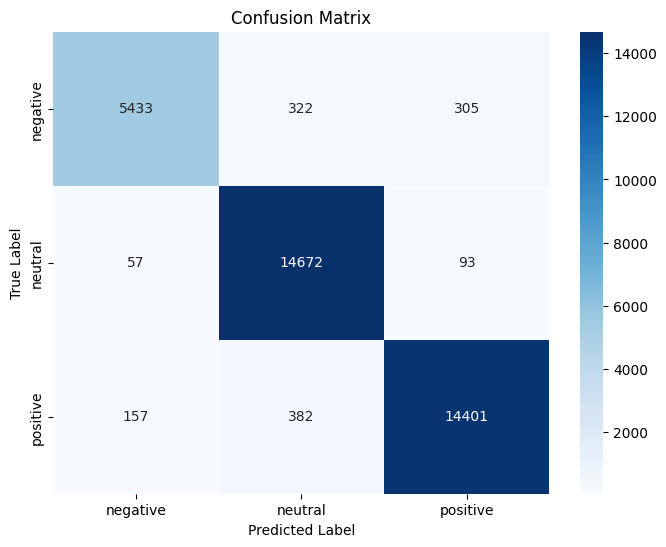

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Karışıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Tahminleri yapma
y_pred = model.predict(X_test, batch_size=128, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporunu yazdırma
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Doğruluk skorunu yazdırma
print("Accuracy Score:", accuracy_score(y_test, y_pred))

280/280 [==============================] - 23s 81ms/step
Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.90      0.93      6060
     neutral       0.95      0.99      0.97     14822
    positive       0.98      0.96      0.97     14940

    accuracy                           0.96     35822
   macro avg       0.96      0.95      0.96     35822
weighted avg       0.96      0.96      0.96     35822

Accuracy Score: 0.9633465468148066


BLSTM

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, SpatialDropout1D, Dropout, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from gensim.utils import simple_preprocess
import nltk
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")

# Metin verilerini temizleme ve NaN değerleri doldurma
data = data.dropna(subset=['text'])
data['text'] = data['text'].astype(str)

# Metin temizleme fonksiyonu
def clean_text(text):
    # URL'leri kaldırma
    text = re.sub(r'http\S+', '', text)
    # Mentions (@) kaldırma
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldırma
    text = re.sub(r'#\w+', '', text)
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    # Sadece harfleri ve boşlukları bırakma
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Küçük harfe çevirme
    text = text.lower().strip()
    return text

# Metin verilerini temizleme ve NaN değerleri doldurma
data['text'] = data['text'].apply(clean_text)

# Stopwords ve lemmatizer
stop_words = set(stopwords.words('english'))
additional_stopwords = {'covid', 'coronavirus', 'daily', 'india', 'update', 'need', 'pandemic', 'virus', 'rt', 'today',
                        'people', 'amp', 'test', 'even', 'dont', 'report', 'like', 'number', 'latest', 'case', 'death', 'mask',
                        'today', 'time', 'many', 'little', 'first', 'total', 'now', 'day', 'week', 'month', 'year', 'ago', 'next',
                        'back', 'then', 'when', 'where', 'here', 'there', 'every', 'all', 'some', 'any', 'can', 'will', 'just',
                        'about', 'how', 'why', 'very', 'much', 'more', 'most', 'no', 'nor', 'not', 'off', 'out', 'up', 'down',
                        'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
                        'after', 'above', 'below', 'to', 'from', 'in', 'out', 'over', 'under', 'again', 'further', 'once'}

expanded_stopwords = set()
for word in additional_stopwords:
    expanded_stopwords.add(word)
    expanded_stopwords.add(word + 's')  # Çoğul hal ekleniyor
    if word.endswith('e'):
        expanded_stopwords.add(word[:-1])  # Çoğul halden tekil hale geçiş ekleniyor
        expanded_stopwords.add(word[:-1] + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word[:-1] + 'ing')  # Şimdiki zaman ekleniyor
    elif word.endswith('y'):
        expanded_stopwords.add(word[:-1] + 'ies')  # İyelik eki ekleniyor
        expanded_stopwords.add(word[:-1] + 'ied')  # Geçmiş zaman ekleniyor
    else:
        expanded_stopwords.add(word + 'ed')  # Geçmiş zaman ekleniyor
        expanded_stopwords.add(word + 'ing')  # Şimdiki zaman ekleniyor

stop_words = stop_words.union(expanded_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Metin verilerini temizleme ve NaN değerleri doldurma
data['text'] = data['text'].apply(preprocess_text)

# Duygu etiketleme için TextBlob kullanma
def label_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['text'].apply(label_sentiment)

# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Sentiment'], test_size=0.2, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize metin verileri
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Veri boyutlarını ayarlama
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Öznitelik mühendisliği: Metindeki kelime sayısı özelliğini ekleyelim
def count_words(text):
    return len(text.split())

X_train_word_count = np.array([count_words(text) for text in data['text'][X_train.flatten()]])
X_test_word_count = np.array([count_words(text) for text in data['text'][X_test.flatten()]])

# Önceden eğitilmiş GloVe kelime gömme vektörlerini yükleme
embedding_path = '/content/drive/MyDrive/glove.6B.100d.txt'
embeddings_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Kelime gömme matrisi oluşturma
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from sklearn.metrics import accuracy_score

# Veriyi yeniden yükleyelim ve daha küçük bir veri kümesi alalım
data_sampled = data.sample(frac=0.1, random_state=42)

# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data_sampled['text'], data_sampled['Sentiment'], test_size=0.2, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize metin verileri
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Veri boyutlarını ayarlama
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Önceden eğitilmiş GloVe kelime gömme vektörlerini yükleme
embedding_path = '/content/drive/MyDrive/glove.6B.100d.txt'
embeddings_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Kelime gömme matrisi oluşturma
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Model oluşturma
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Model derleme
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model eğitimi
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/5
448/448 [==============================] - 116s 245ms/step - loss: 0.9298 - accuracy: 0.5546 - val_loss: 0.7629 - val_accuracy: 0.6785
Epoch 2/5
448/448 [==============================] - 119s 265ms/step - loss: 0.8094 - accuracy: 0.6458 - val_loss: 0.6791 - val_accuracy: 0.7212
Epoch 3/5
448/448 [==============================] - 114s 255ms/step - loss: 0.7519 - accuracy: 0.6767 - val_loss: 0.6338 - val_accuracy: 0.7485
Epoch 4/5
448/448 [==============================] - 126s 281ms/step - loss: 0.7042 - accuracy: 0.7060 - val_loss: 0.6051 - val_accuracy: 0.7569
Epoch 5/5
448/448 [==============================] - 130s 290ms/step - loss: 0.6762 - accuracy: 0.7187 - val_loss: 0.5816 - val_accuracy: 0.7633


In [3]:

# Tahmin yapma
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))




112/112 [==============================] - 5s 37ms/step
Accuracy: 0.7633268210996371
              precision    recall  f1-score   support

           0       0.71      0.51      0.60       581
           1       0.72      0.94      0.82      1704
           2       0.89      0.65      0.75      1298

    accuracy                           0.76      3583
   macro avg       0.77      0.70      0.72      3583
weighted avg       0.78      0.76      0.75      3583



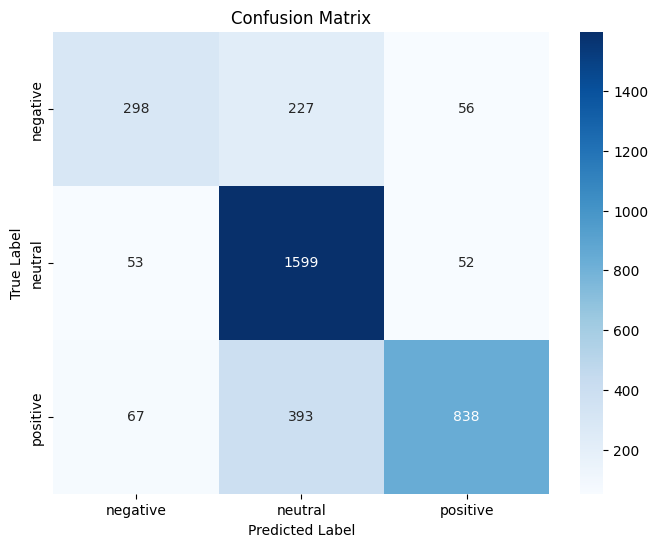

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Karışıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()